# Zadanie 1 - kNN - własna implementacja
Proszę przedstawić własną implementację algorytmu “K najbliższych sąsiadów”.

Zadanie:
1. Baza danych Iris - proszę podzielić na zbiór uczący i testowy
2. Znaleźć najlepszą wartość k dla wybranego zbioru testowego (oraz przedstawić na wykresie zmianę k oraz błąd - dla obu zbiorów, testowego i uczącego)
Wybieramy wartość k (np. od 1 do n, gdzie n będzie wartością dla której wyniki algorytmu będą się ponownie pogarszać)
Dla każdego przykładu ze zbioru testowego poszukujemy k obserwacji, które są najbliższe do naszego analizowanego przykładu. Do wyznaczania odległości skorzystaj z odległości Eukleidesa.
Przewaga danej klasy pośród k najbliższych sąsiadów (ze zbioru uczącego) świadczy o przynależności przykładu do tej klasy.
Użyj najczęściej pojawiającej się wartości z “k najbliższych sąsiadów” jako wartość dla nie zaklasyfikowanego przykładu.
Dla każdego przypadku k, po zaklasyfikowaniu wszystkich przykładów ze zbioru testowego, policz błąd (np. ilość przykładów źle zaklasyfikowanych do liczebności zbioru) i zapisz parę (k - błąd) w celu zebrania danych do wykresów podsumowujących.
3. Zaproponuj najlepsze k dla zbioru.

In [6]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from sklearn.metrics import accuracy_score
import numpy as np

In [89]:
db_iris = datasets.load_iris()

In [108]:
# podzial na zbior uczacy i testowy
features_train, features_test, labels_train, labels_test = train_test_split(db_iris.data, db_iris.target, test_size=0.3)

In [109]:
# zwraca najczestszy element ze zbioru knn
def select_most_common_class(knn):
    unique, counts = np.unique(knn, return_counts = True)
    return unique[np.argmax(counts)]

In [112]:
k = 4

predictions = []
for sample in features_test:
    neighbors = np.zeros((features_train.shape[0], 2), dtype = float)
    neighbors[:,1] = labels_train

    for idx, known_sample in enumerate(features_train):
        neighbors[idx, 0] = distance.euclidean(sample, known_sample)

    neighbors = neighbors[np.argsort(neighbors[:,0])]
    knn = neighbors[0:k, 1]
    predictions.append(select_most_common_class(knn))    

accuracy = accuracy_score(labels_test, predictions)
accuracy

0.9777777777777777

# Zadanie 2 - kNN - Python (sklearn)

In [111]:
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


# wczytanie zbioru, podzial na zbior uczacy i testowy
db_iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(db_iris.data, db_iris.target, test_size=0.3)

k = 4 # wybrane z poprzedniego zadania

# uzywam sklearn do osiągnięcia tego samego co wyzej
classifier = KNeighborsClassifier(k)
classifier.fit(X_train, y_train)
accuracy = classifier.score(X_test, y_test)
accuracy

0.9777777777777777

# Zadanie 3 - drzewa decyzyjne

### Przykład z instrukcji

In [12]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [13]:
clf.predict(iris.data[:1, :])

array([0])

In [14]:
clf.predict_proba(iris.data[:1, :])

array([[1., 0., 0.]])

In [15]:
from sklearn.externals.six import StringIO  
import pydot 
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write_pdf("iris.pdf")

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


### Zadanie - MNIST

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from scipy.io import loadmat

**Plik z instrukcji nie działał, ściągnąłem z internetu**

- link: https://github.com/daniel-e/mnist_octave

- oryginalny mnist ma obrazki w rozmiarze 28x28
- usunąłem linijke od błędu w zbiorze
- usunąłem transpozycje z printowanaia plotu - w tym zbiorze nie jest potrzebna
- za to musiałem transponowac `y`

In [37]:
# wczytywanie danych
dane = loadmat('mnist.mat')

Zad 1. Podziel dane na parametry X oraz odpowiedź y:

In [57]:
X = dane["trainX"]
y = dane["trainY"]

# Standaryzacja
for i in range(X.shape[0]):
    X[i,:] = X[i,:]/np.std(X[i,:])
 
# Zamiana cyfry 10 -> 0 (błąd w zbiorze danych)    
# y[np.where(y==10)]=0

Zad 2. Proszę wyświetlić liczbę cyfr oraz liczbę pikseli przypadającą na jeden obraz

In [52]:
digits, pixels = X.shape
digits, pixels

(60000, 784)

In [58]:
y = y.T
y.shape

(60000, 1)

Zad 3. Wyswietlenie przykladowych cyfr

In [78]:
def plot_mnist(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.05)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        # tu usunalem transpozycje przy reshape()
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

In [55]:
w, h = 28, 28

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


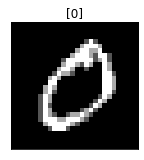

In [79]:
plot_mnist([X[1]], [y[1]], w, h, n_row=1, n_col=1)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


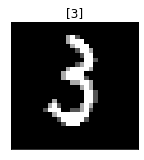

In [80]:
plot_mnist([X[1234]], [y[1234]], w, h, n_row=1, n_col=1)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


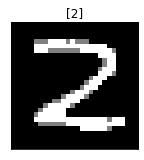

In [81]:
plot_mnist([X[220]], [y[220]], w, h, n_row=1, n_col=1)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


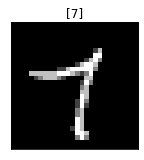

In [82]:
plot_mnist([X[4200]], [y[4200]], w, h, n_row=1, n_col=1)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


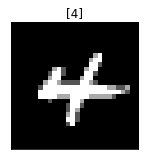

In [83]:
plot_mnist([X[6323]], [y[6323]], w, h, n_row=1, n_col=1)

Zad 4 - podzial na zbiory

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Zad 5

In [65]:
DEPTH = 10
clf = tree.DecisionTreeClassifier(max_depth=DEPTH)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred

array([2, 8, 1, ..., 0, 1, 3], dtype=uint8)

Zad 6

In [66]:
# F1
f1_score(y_test, y_pred, average=None)

array([0.90545355, 0.93960396, 0.79686656, 0.78880266, 0.82685512,
       0.75742429, 0.87327901, 0.88290269, 0.7765925 , 0.75469673])

In [67]:
# Macierz bledow
confusion_matrix(y_test, y_pred)

array([[1652,    0,   43,   12,    9,   43,   25,   10,   28,   21],
       [   2, 1898,   34,   15,    7,    9,   12,   17,   17,   20],
       [  31,   15, 1475,   46,   29,   36,   43,   22,   82,   36],
       [  11,   11,   70, 1423,   15,  162,    9,   23,   24,   87],
       [  10,   10,   21,   23, 1404,   30,   28,   12,   10,  160],
       [  20,   10,   34,  108,   36, 1288,   35,   16,   26,   67],
       [  26,    6,   39,    7,   38,   33, 1554,    4,   38,    7],
       [   6,   27,   60,   30,   29,   21,    3, 1606,   18,   75],
       [  23,   25,   80,   58,   27,   65,   94,    8, 1274,   95],
       [  25,    7,   31,   51,   94,   74,    4,   45,   15, 1406]])

In [68]:
# Raport
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1843
           1       0.94      0.93      0.94      2031
           2       0.78      0.81      0.80      1815
           3       0.80      0.78      0.79      1835
           4       0.83      0.82      0.83      1708
           5       0.73      0.79      0.76      1640
           6       0.86      0.89      0.87      1752
           7       0.91      0.86      0.88      1875
           8       0.83      0.73      0.78      1749
           9       0.71      0.80      0.75      1752

    accuracy                           0.83     18000
   macro avg       0.83      0.83      0.83     18000
weighted avg       0.84      0.83      0.83     18000

